In [1]:
# Package imports# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 29004
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=4>
  FREQ     ERR    LGINT    DR    ELO    GUP   TAG   QNFMT    QN'       QN"   
  MHz      MHz   MHz nm2        1 / cm                                       
float64  float64 float64 int64 float64 int64 int64  int64    str9      str9  
-------- ------- ------- ----- ------- ----- ------ ----- --------- ---------
86670.76    0.06  -4.294     3  0.0129     5 -29004   325 1 0 1 2 2 0 0 0 1 1
86708.36    0.04 -4.5248     3     0.0     3 -29004   325 1 0 1 2 1 0 0 0 1 0
86777.46    0.04 -4.5241     3  0.0129     3 -29004   325 1 0 1 1 1 0 0 0 1 1
86805.78  0.1001 -4.9915     3  0.0129     1 -29004   325 1 0 1 1 0 0 0 0 1 1, <Table length=4>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG  QNFMT    QN'        QN"    
   MHz       MHz   MHz nm2        1 / cm                                         
 float64   float64 float64 int64 float64  int64 int64 int64   str10      str10   
---------- ------- ------- ----- -------- ----- ----- ----- ---------- ----------
 88093.932 3

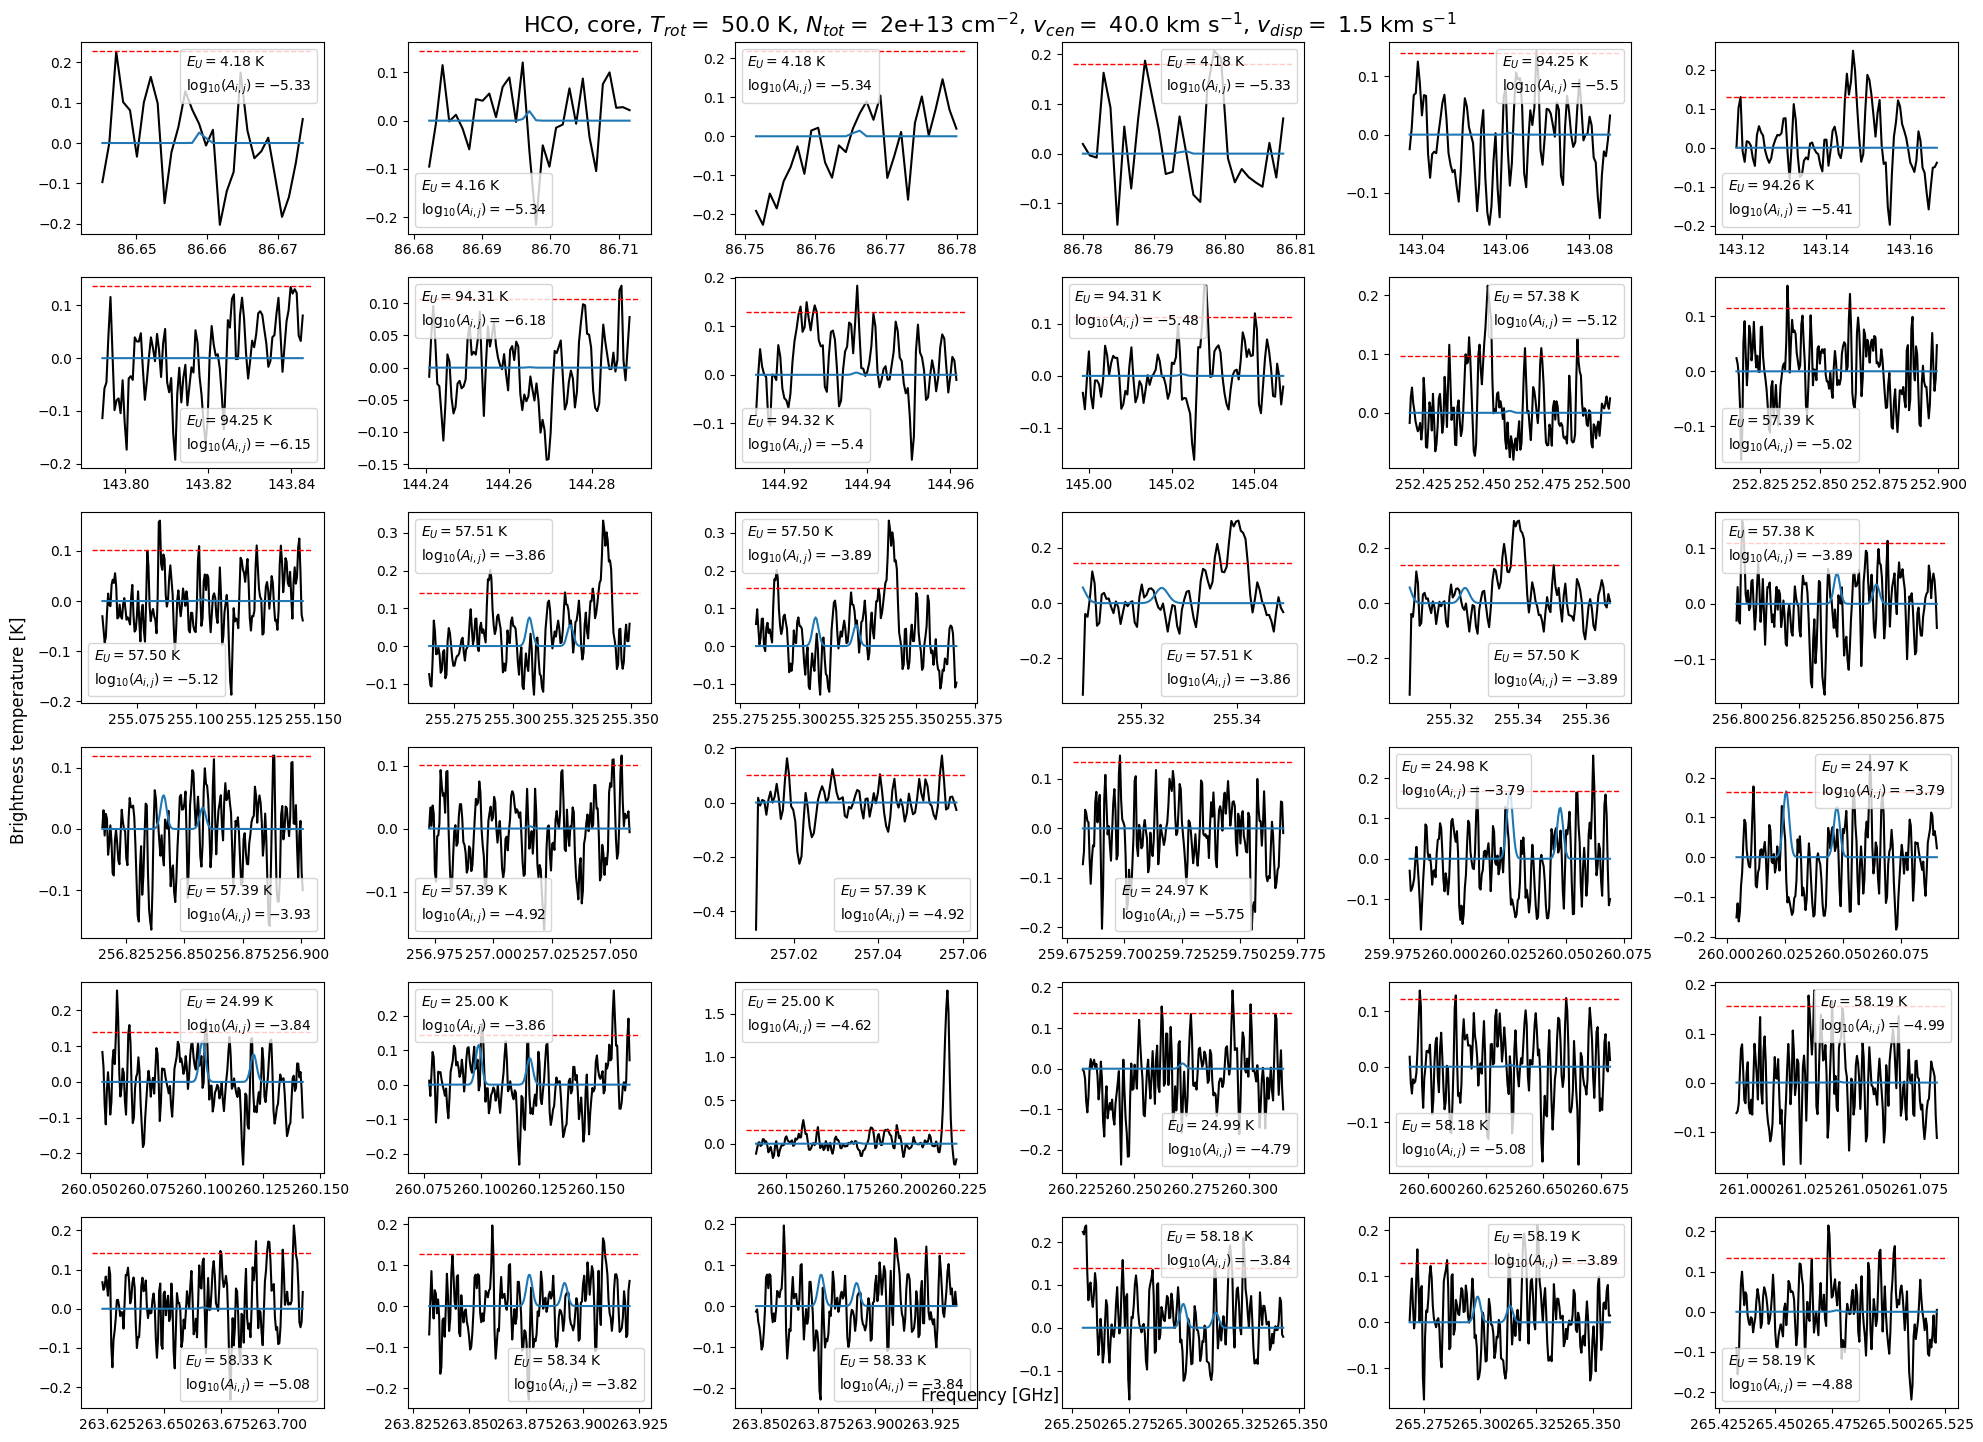

In [7]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 2.0e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=6, ncols=6, parse_loc=False, line_by_line=True, name_for_plot=f'HCO', extr_type="coord", crd=crd, 
               EU_cutoff_K=100, aij_cutoff=-7, show_2_sigma=True)

In [8]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

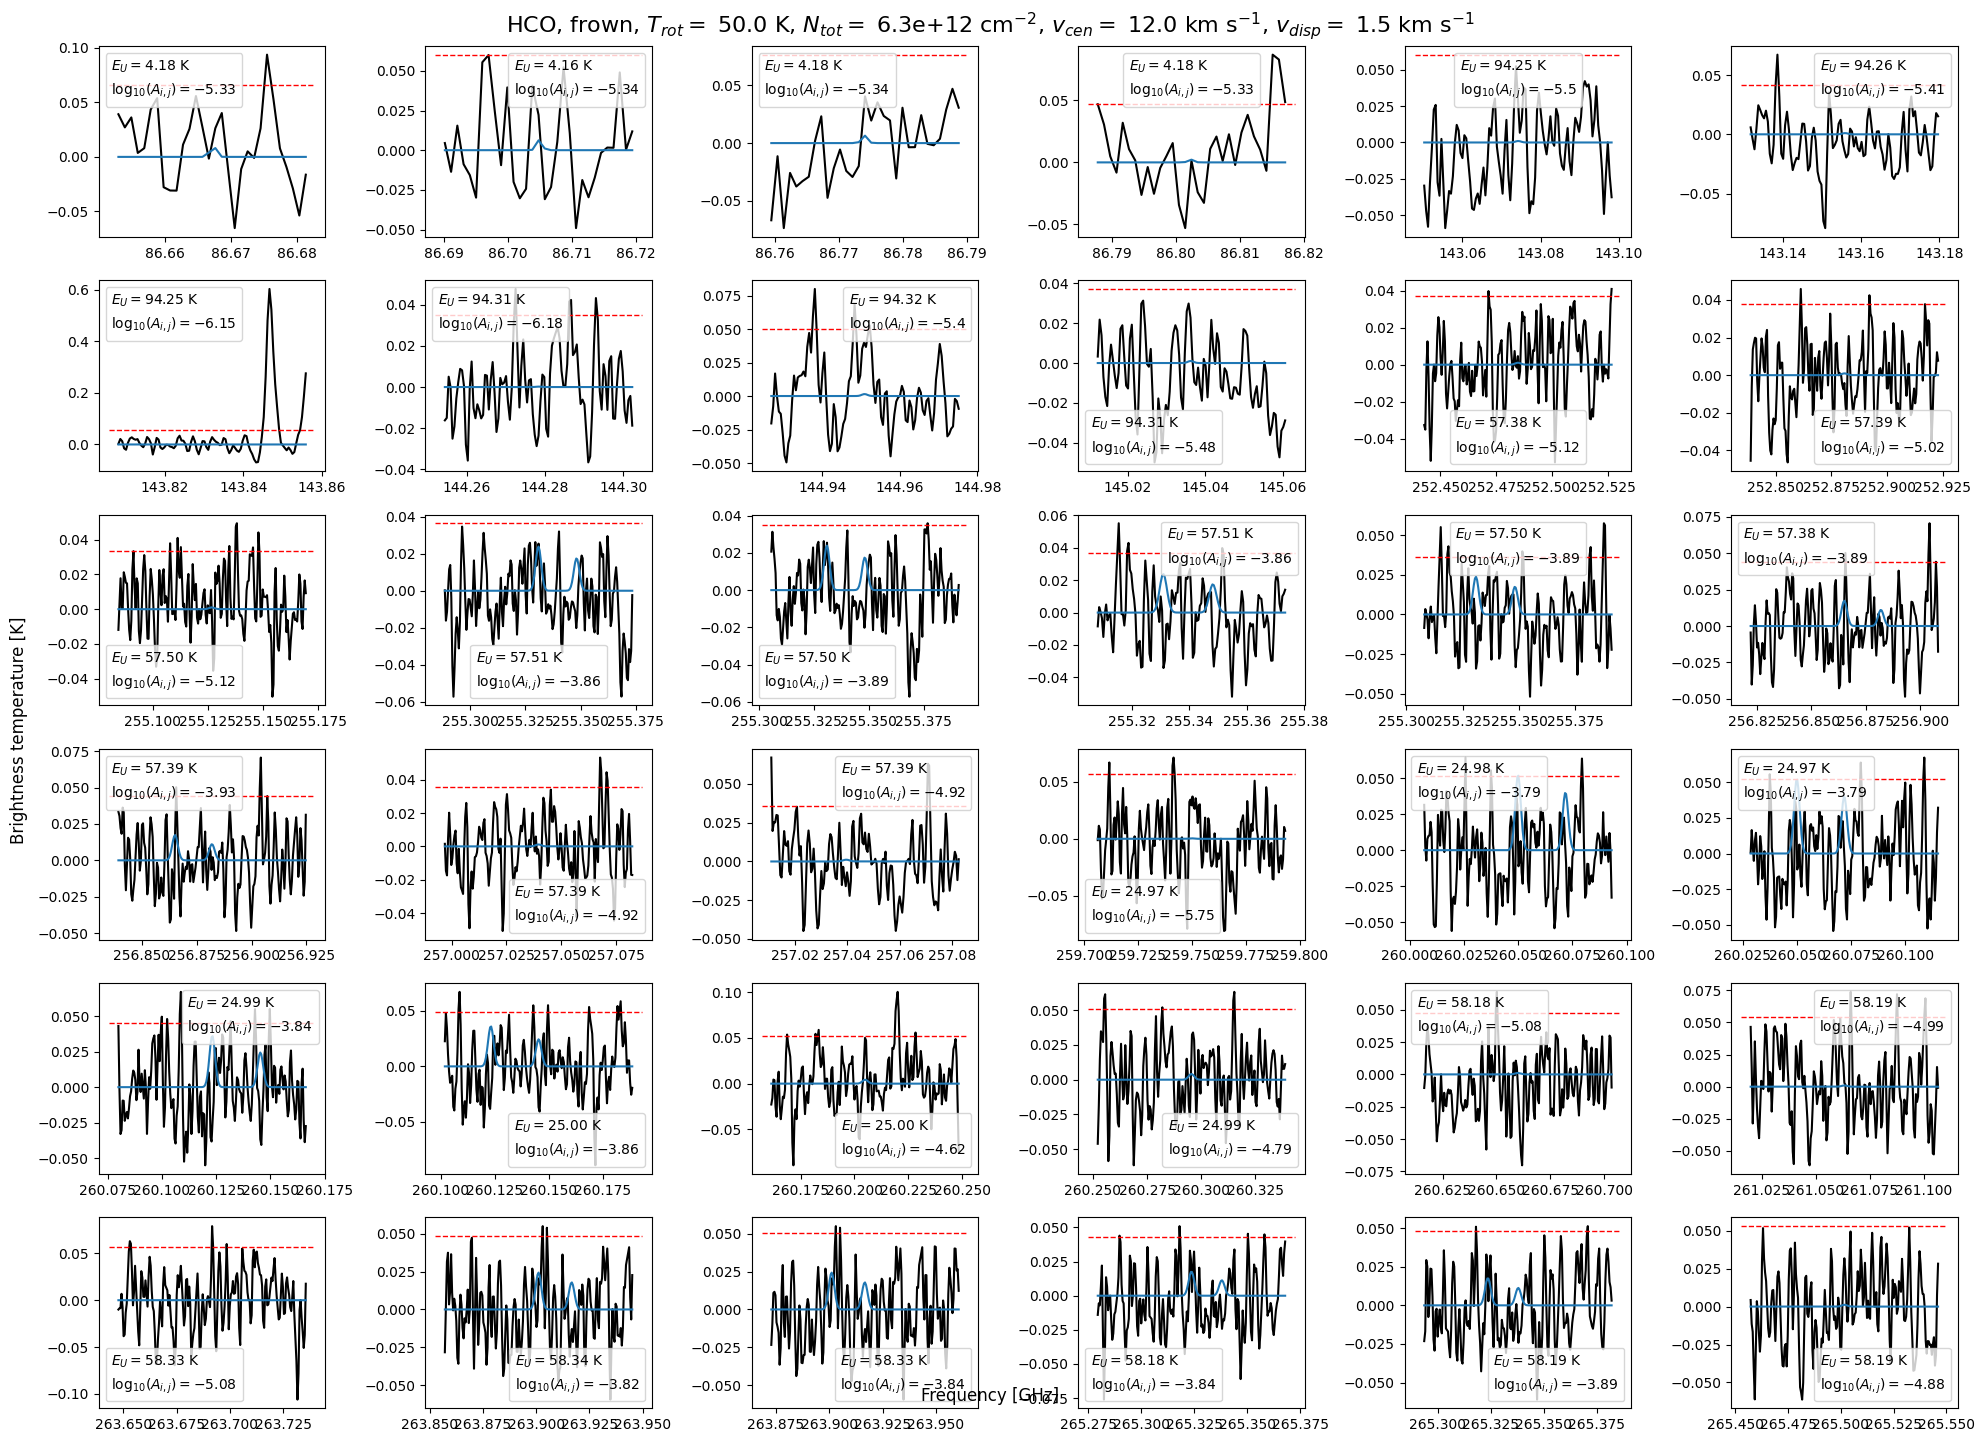

In [9]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 6.3e+12, v_cen = 12.*u.km/u.s, v_disp = 1.5*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                       nrows=6, ncols=6, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'HCO', extr_type="reg", 
                       aij_cutoff=-7, return_freqs=True, show_2_sigma=True)

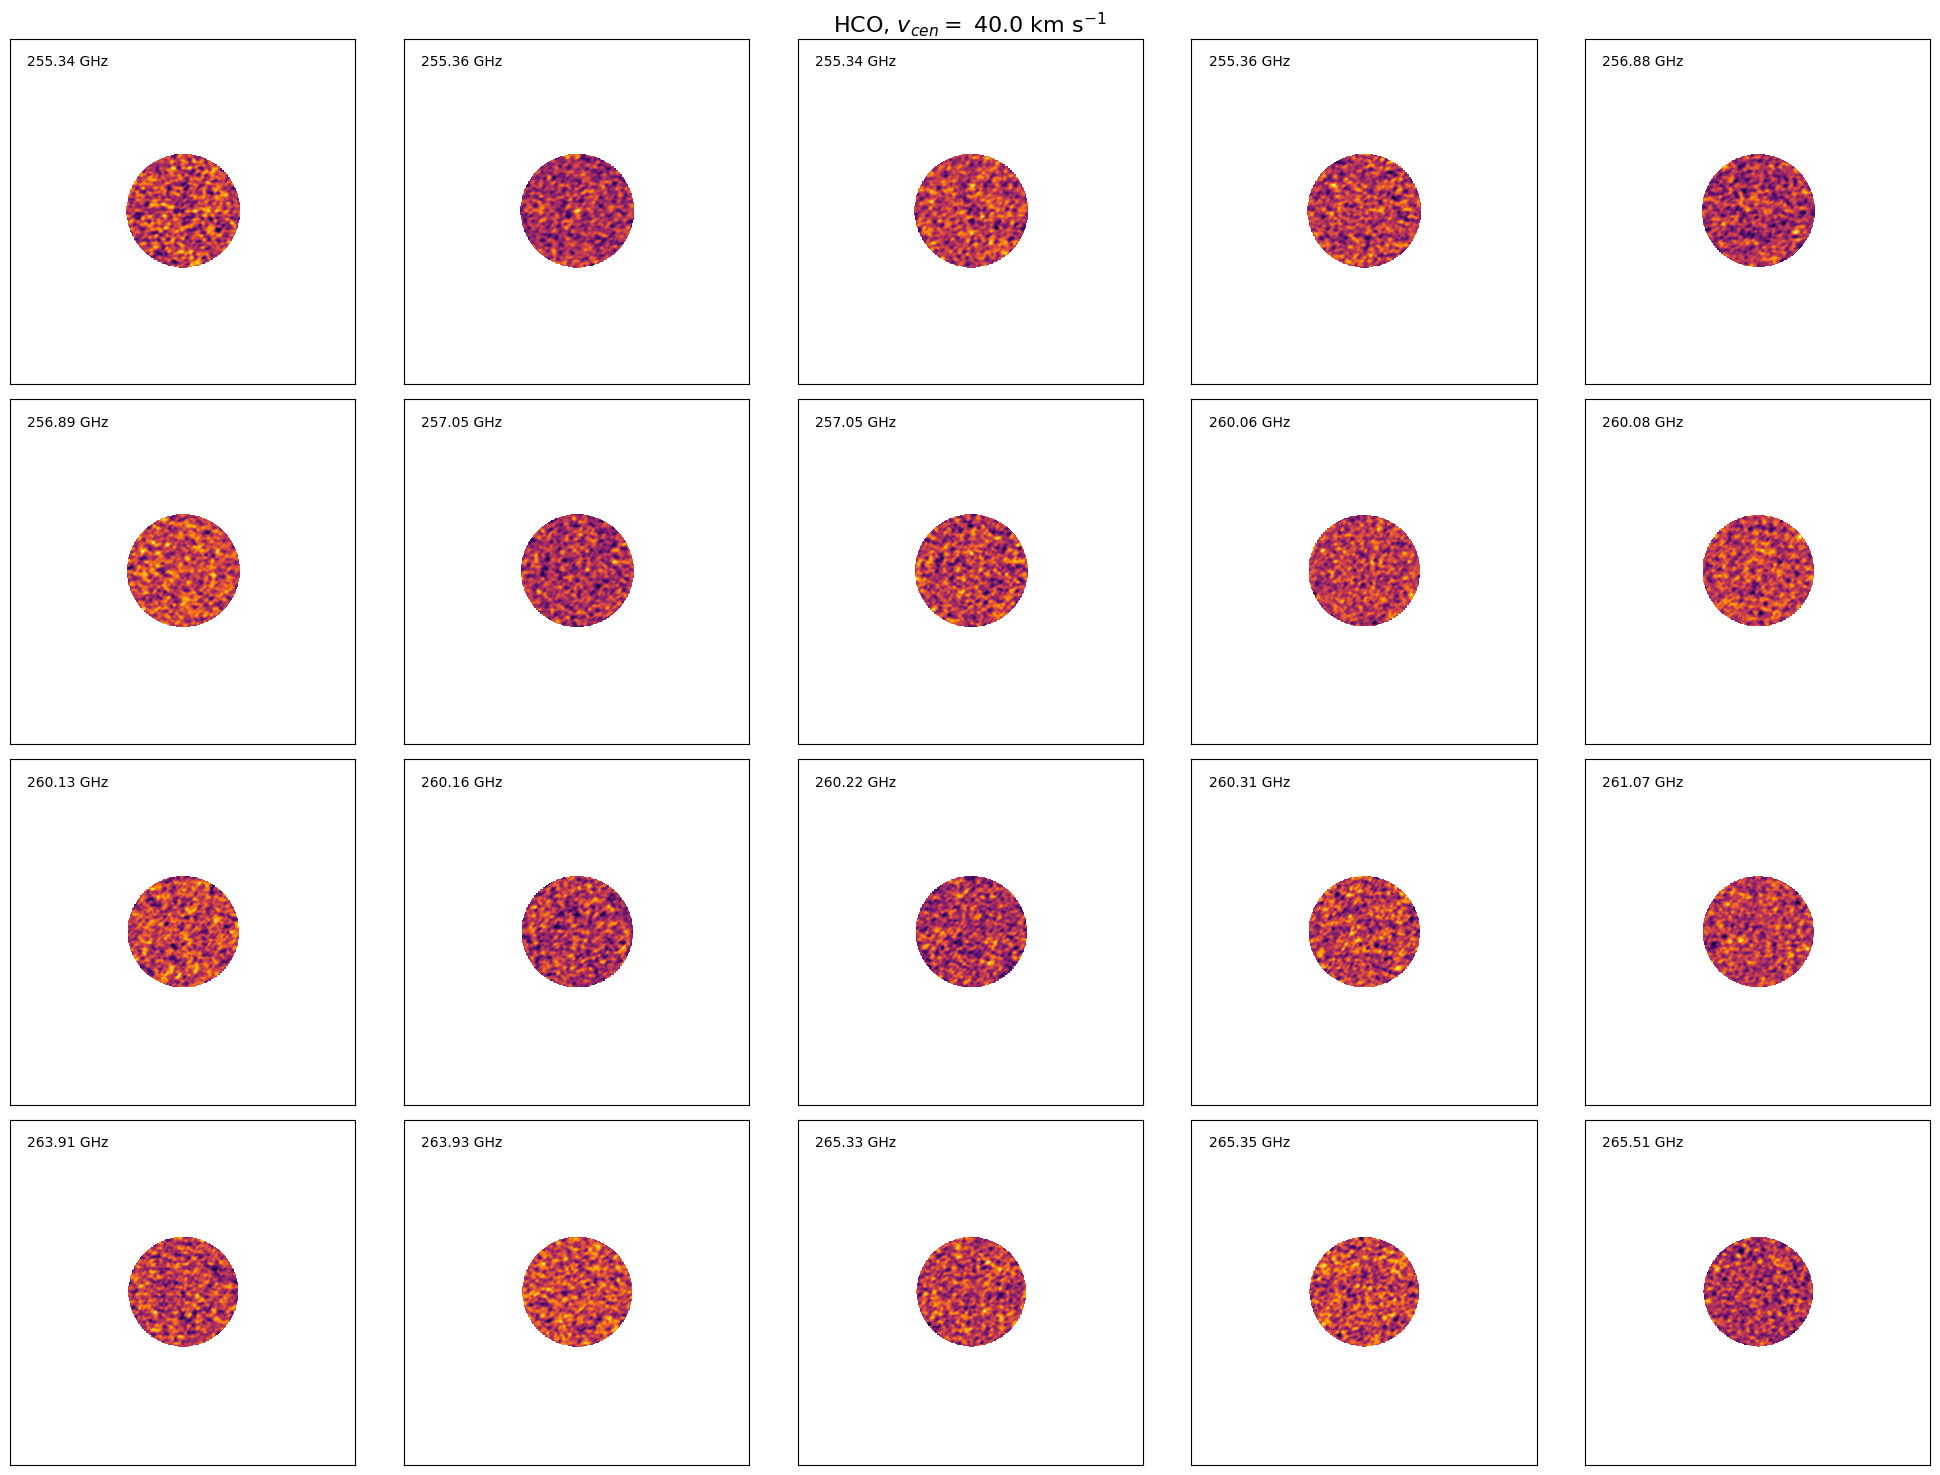

In [21]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=20, fig_height=15, nrows=4, ncols=5, name_for_plot=f'HCO')

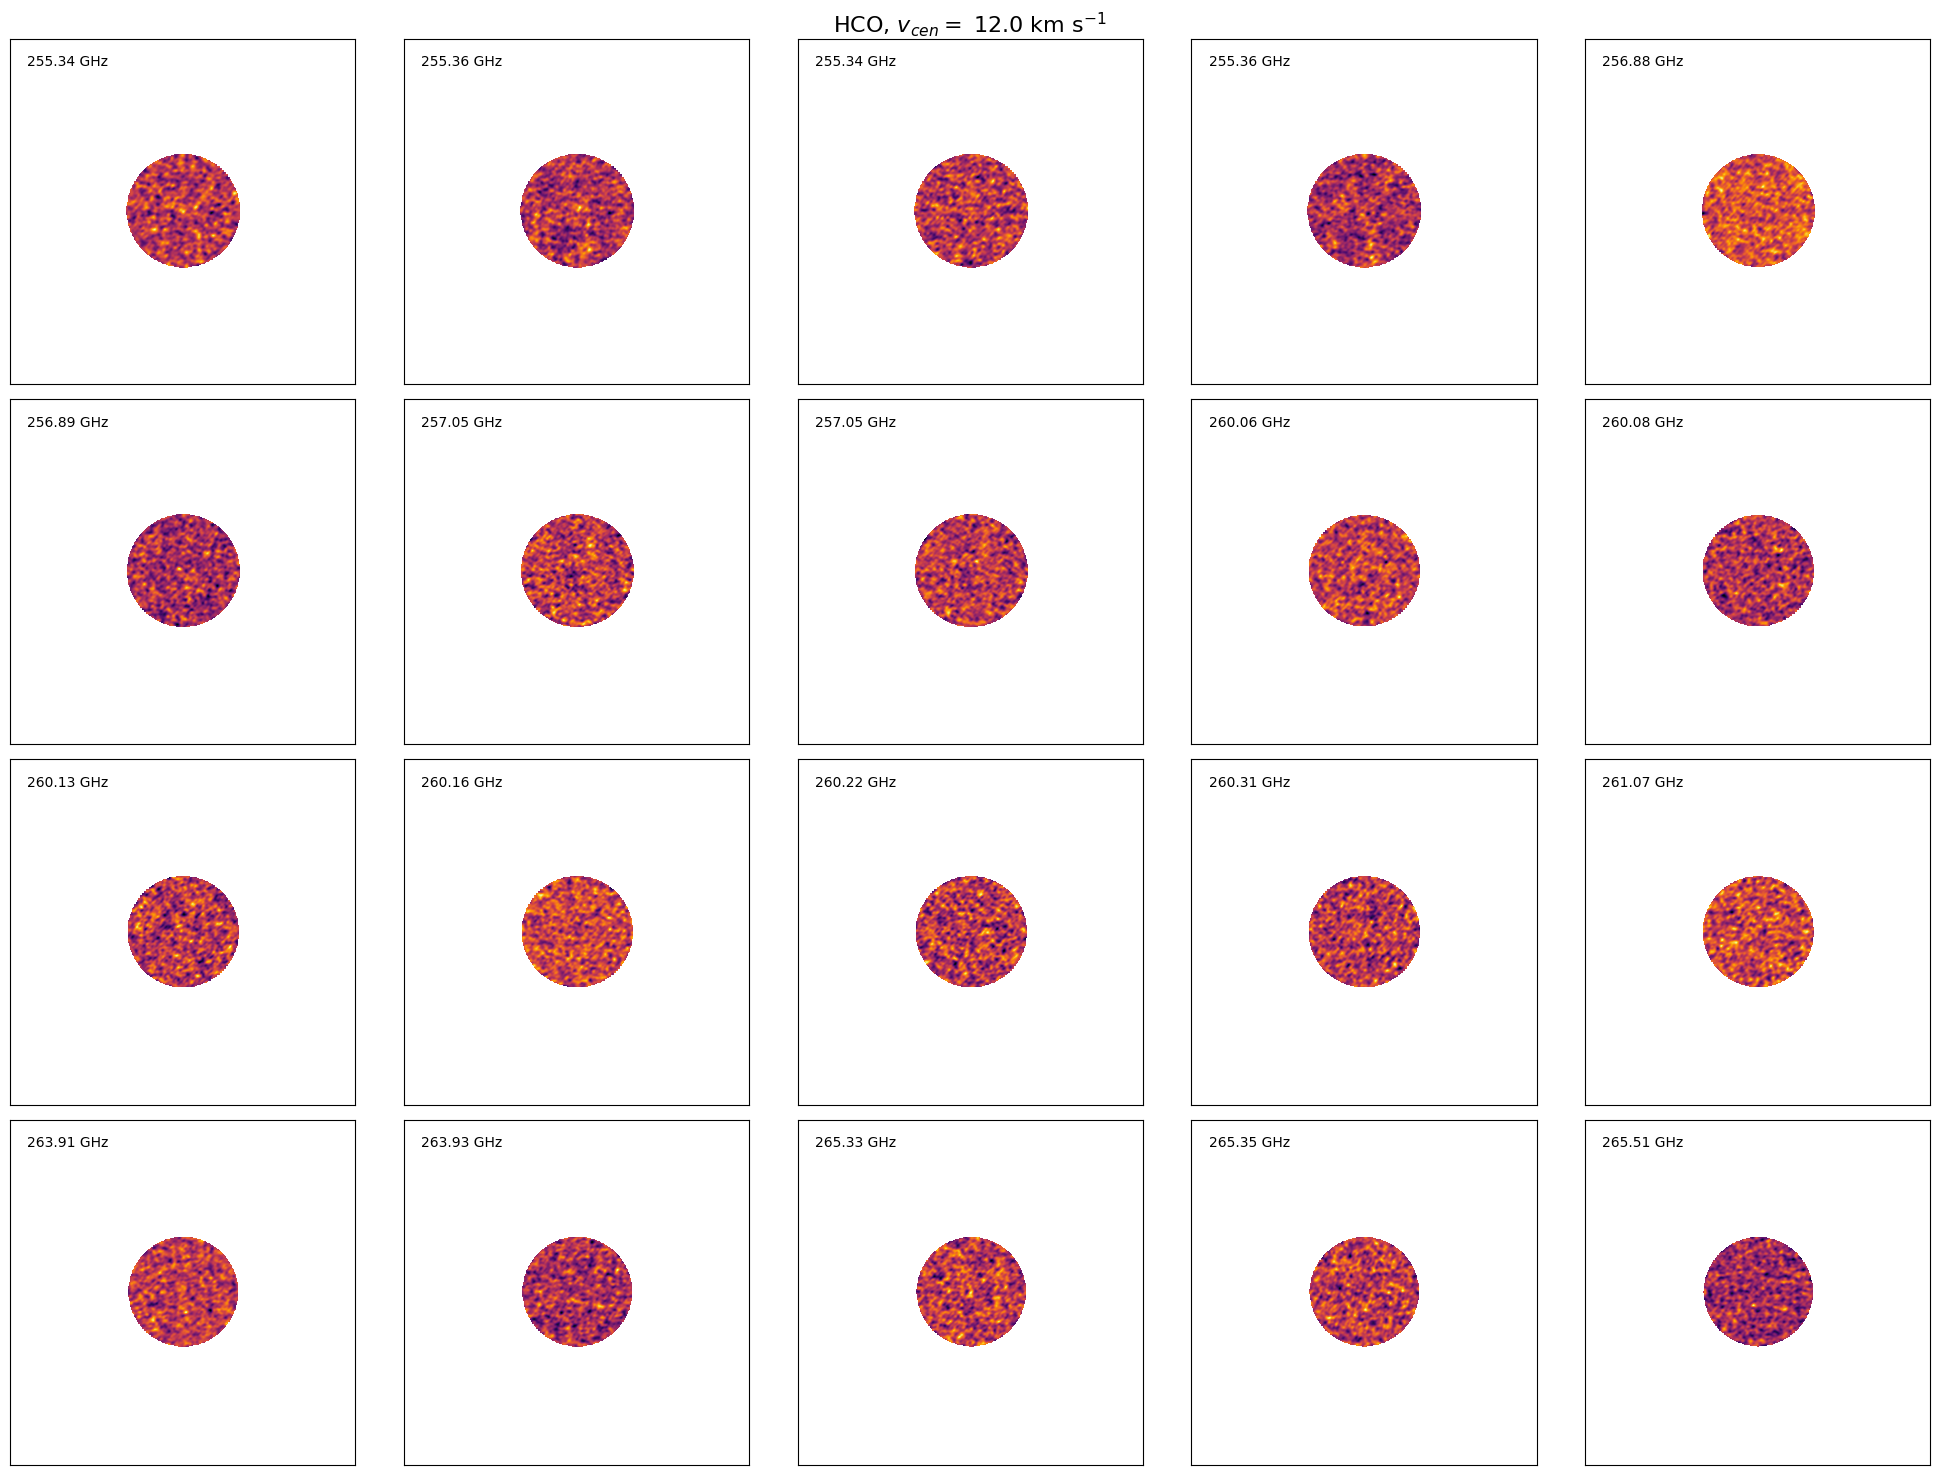

In [22]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=20, fig_height=15, nrows=4, ncols=5, name_for_plot=f'HCO')